**2021 빅데이터 통신 플랫폼 경진대회**

# 주제 : 코로나 시대, 배달의 왕국! 하지만 현실은 플라스틱 왕국?

## 부주제: 배달 데이터와 플라스틱 발생량 데이터를 통한 인사이트 도출

> 팀명: 홍길동 배달

> 팀원: 배달전문홍길동, 방역전문 홍길동, 홍길동홍보팀

# 목차
1. 개요
    - 목적
    - 활용 데이터(출처)
    - 적용 기술

2. 배달 데이터와 코로나 확진자 수의 관계
    - 코로나 데이터 분석
    - 배달 데이터 분석
    - 상관 관계 분석

3. 배달 데이터와 플라스틱 사용량의 관계
    - 재활용 폐기물 발생량 분석
    - 상관 관계

4. 제안 및 기대효과
    - 필요성
    - 제안 및 기대효과

5. 참고 자료

### # 1. 개요

### 1-1. 목적



*   코로나 바이러스의 확산으로 인해 재택근무, 비대면 모임 등이 활성화 되었고, 자연스럽게 배달 이용량 역시 증가하고 있습니다. 

*   배달량이 증가함에 따라 음식을 담는 용기로 주로 사용되는 플라스틱의 배출량 역시 증가하고 있습니다.
 
*   저희는 제공받은 코로나 관련 데이터, 배달량 데이터를 서울시의 플라스틱 배출량 데이터와 함께 분석하여 인사이트를 도출하고, 이를 해결하기 위한 해결방법을 제안하고자 합니다.



### 1-2. 활용 데이터(출처)

> **배달데이터(dlvr_call.csv)**
>> 음식점에서 배달을 위해 배달기사를 호출하고 고객에게 배달이 완료되는 과정에서 생산되는 데이터<br>
>> 출처 : KT 통신 빅데이터 플랫폼 내 충북대학교 데이터

<br>

> **코로나데이터(PatientInfo.csv)**
>> 2020년 코로나 확진자가 발생하는 과정에서 생산된 데이터<br>
>> 출처 : https://www.bigdata-telecom.kr

<br>

> **생활 폐기물 및 재활용품 데이터(서울시_재활용폐기물.csv)**
>> 2020년 서울시 각 구청에서 발생한 생활폐기물 및 재활용 폐기물이 발생하는 과정에서 생산된 데이터<br>
>> 출처 : 정보공개포털 (https://www.open.go.kr/)

### 1-3. 적용 기술

#### 라이브러리 Import 및 설정

In [1]:
import scipy.stats as stats
import numpy as np
import pandas as pd
import warnings
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
from matplotlib.pyplot import *

warnings.filterwarnings('ignore')

mpl.rc('font', family='Malgun Gothic')
plt.rc('font', family='Malgun Gothic')
matplotlib.style.use('fivethirtyeight')

from notebook.services.config import ConfigManager

cm = ConfigManager().update('notebook', {'limit_output': 1000000})
warnings.filterwarnings('ignore')
pd.set_option('display.max_rows', None)

C:\Users\rlfal\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
def hide_x_label(ax) : # x label을 숨기는 함수
    x_axis = ax.axes.get_xaxis()
    x_label = x_axis.get_label()
    x_label.set_visible(False)
    
def show_height(ax, height_unit, multiply, decimals, font_size = 12) : # bar 그래프의 높이를 표시하는 함수
    for a in ax.patches:
        txt = np.round(a.get_height() * multiply, decimals=decimals) 

        anot = txt.astype('str')
        ax.annotate(anot + height_unit, (a.get_x() +a.get_width()/2, a.get_height() ),
                    ha='center', va='center', xytext=(0, 10),
                    textcoords='offset points', fontsize=font_size)

<br>


# 2. 배달 데이터와 코로나 확진자 수의 관계

### 2-1. 코로나 데이터 분석

>재활용폐기물 데이터는 서울시의 재활용폐기물 배출량만을 포함하기 때문에 일관된 분석을 위해서 배달 데이터와 코로나 데이터 모두 서울시의 데이터만을 사용하였습니다.

>2020년 코로나 확진자가 처음 발생하면서 신천지 교회에서 코로나 확진자가 발생했을 때와 이태원 클럽에서 코로나 확진자가 발생했을 때를 시점으로 확진자 수가 급격하게 증가함을 확인할 수 있습니다.

In [3]:
# 코로나 환자 Data Read, 서울 지역만 select
corona = pd.read_csv('./PatientInfo.csv')
is_seoul= corona["province"] == "Seoul"
corona = corona[is_seoul]

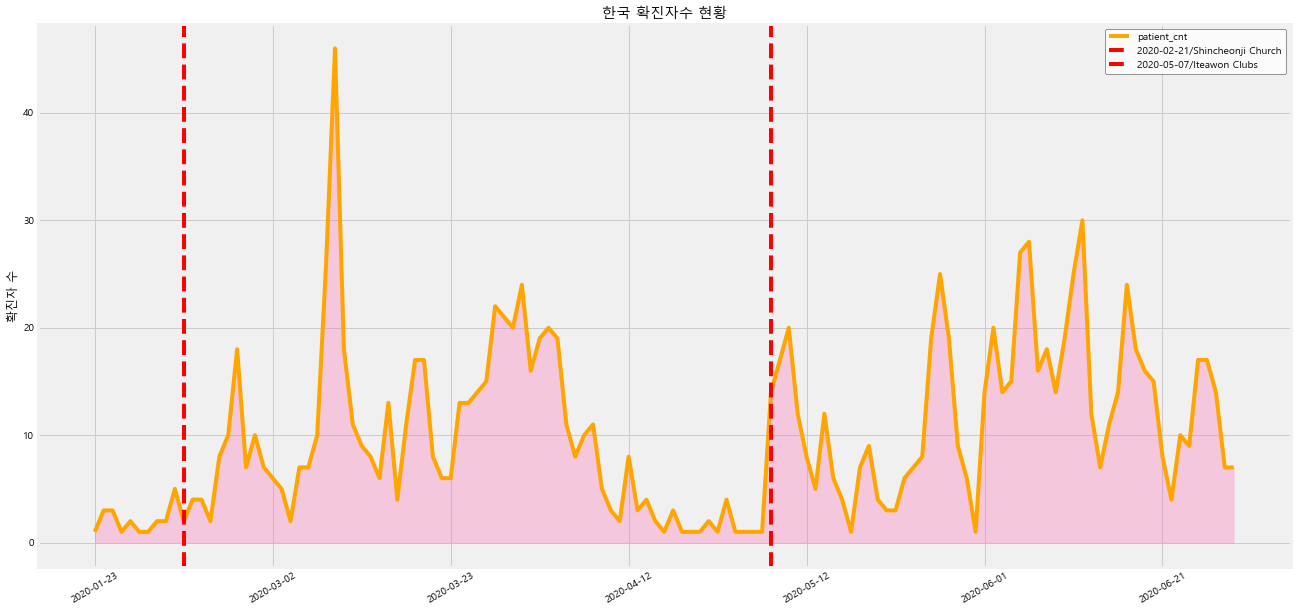

In [4]:
# 서울 지역의 코로나 일일 확진자 수 추이 시각화
confirmed_cnt = corona.groupby('confirmed_date')["patient_id"].count().reset_index(name='patient_cnt')

ax = confirmed_cnt.plot(x = "confirmed_date", y = ["patient_cnt"], figsize = (20,10), 
                        rot = 30, title = "한국 확진자수 현황", color = "orange", ylabel = "확진자 수")

plt.fill_between(confirmed_cnt["confirmed_date"], confirmed_cnt["patient_cnt"], color = 'hotpink', alpha = .3)

plt.axvline(x = '2020-02-21', color = 'red', linestyle = '--', label = '2020-02-21/Shincheonji Church')
plt.axvline(x = '2020-05-08', color = 'red', linestyle = '--', label = '2020-05-07/Iteawon Clubs')

hide_x_label(ax)
plt.legend(facecolor = "white", edgecolor= "black")
plt.show()

### 2-1. 배달 데이터 분석

>코로나 확진자 수와 서울 시 배달 건수의 상관관계를 알아보기 전 서울시의 2020년도 상반기 배달 건수에 대한 현황을 표현해 보았습니다. (배달 건수는 배달이 완료된 주문만 Count 하였습니다.) 

>배달 건수가 높아질 때를 확인해본 결과 코로나가 초기에 가장 많이 발생했던 신천지 교회 코로나 확진자 발생 이후에 배달량이 높아진 것을 볼 수 있었고, 이태원 클럽, 쿠팡 물류센터 확진자 발생 이후 배달량이 증가하는 것을 확인할 수 있었습니다.

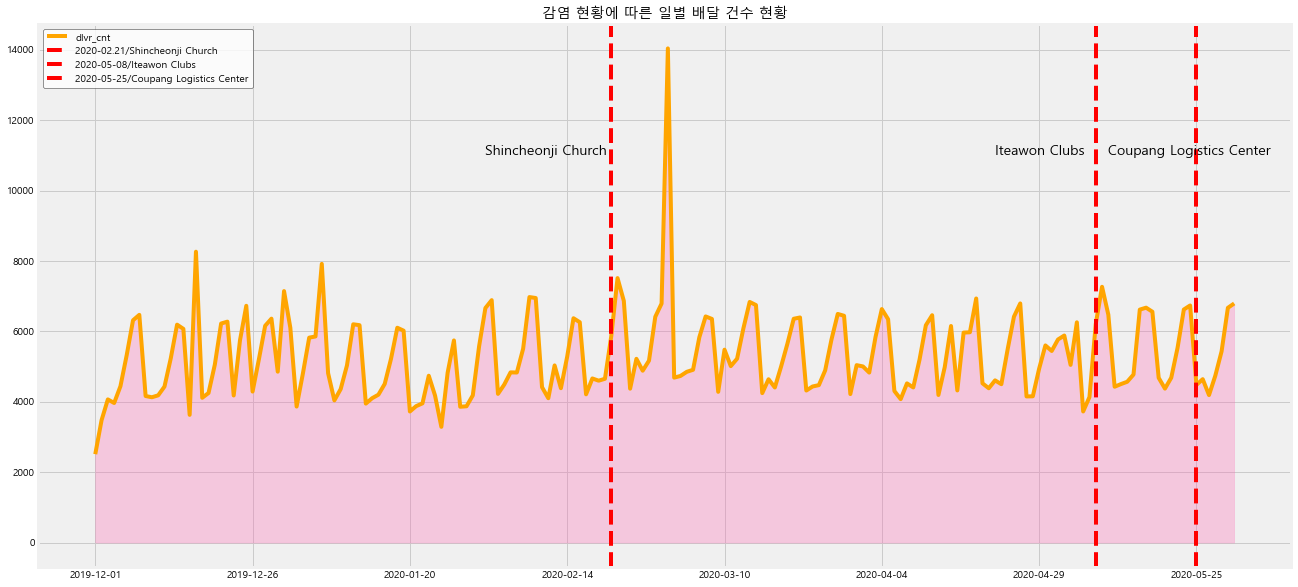

In [5]:
# 배달 Data Read
dlvr_call = pd.DataFrame(pd.read_csv("dlvr_call.csv", encoding = "utf8"))

# 서울특별시의 배달 건만 Select
dlvr_call=dlvr_call[dlvr_call['DLVR_STORE_BRTC_NM'] == '서울특별시']

# 배달 완료된 주문만 사용
is_completed = dlvr_call["DLVR_REQUST_STTUS_VALUE"] == 1
dlvr_call = dlvr_call[is_completed]

# 서울의 배달 건수 현황
dlvr_call_cnt = dlvr_call.groupby('PROCESS_DT')['DLVR_REQUST_STTUS_VALUE'].count().reset_index(name='dlvr_cnt')

ax = dlvr_call_cnt.plot(x = "PROCESS_DT", y = ["dlvr_cnt"], figsize=(20,10), 
                        title = "감염 현황에 따른 일별 배달 건수 현황", color = "orange")

plt.fill_between(dlvr_call_cnt["PROCESS_DT"], dlvr_call_cnt["dlvr_cnt"], color = 'hotpink', alpha = .3)

#Patientinfo.csv의 infection_case를 반영
plt.axvline(x = '2020-02-21', color = 'red', linestyle = '--', label = "2020-02.21/Shincheonji Church")
plt.axvline(x = '2020-05-08', color = 'red', linestyle = '--', label = '2020-05-08/Iteawon Clubs')
plt.axvline(x = '2020-05-25', color = 'red', linestyle = '--', label = '2020-05-25/Coupang Logistics Center')

plt.text('2020-02-01', 11000, 'Shincheonji Church', fontsize = 14)
plt.text('2020-04-22', 11000, 'Iteawon Clubs', fontsize = 14)
plt.text('2020-05-10', 11000, 'Coupang Logistics Center', fontsize = 14)

plt.legend(facecolor = "white", edgecolor= "black")
hide_x_label(ax)
plt.show()

다음은 서울시의 일별 평균 배달 건수입니다.

In [6]:
# 서울시 일별 평균 배달 건수
total_avg_count=dlvr_call.groupby(["PROCESS_DT"])[['DLVR_REQUST_STTUS_VALUE']].count()    
total_avg_count=total_avg_count.mean()
print("전체 평균 배달 건수 : ",total_avg_count.values)

전체 평균 배달 건수 :  [5302.14285714]


>코로나 발생 전과 후를 비교하여 업종별 배달 건수를 비교하였습니다. 

>2019년도와 2020년도의 배달 데이터량이 큰 차이를 보여서 1차 코로나19 대유행의 중심이었던 신천지 교회 확진자 발생일(2020년 2월 21일)을 기준으로 코로나 발생 전, 후를 구분하여 비교 하였습니다.

>코로나 전과 후를 비교하였을 때, 급격하게 증가한 것으로 보이는 분야는 카페/디저트류, 족발/보쌈, 돈까스/일식, 그리고 배달전문업체가 있었습니다. 

Text(0.5, 1.0, '코로나 전/후 업종별 배달 건수 비교')

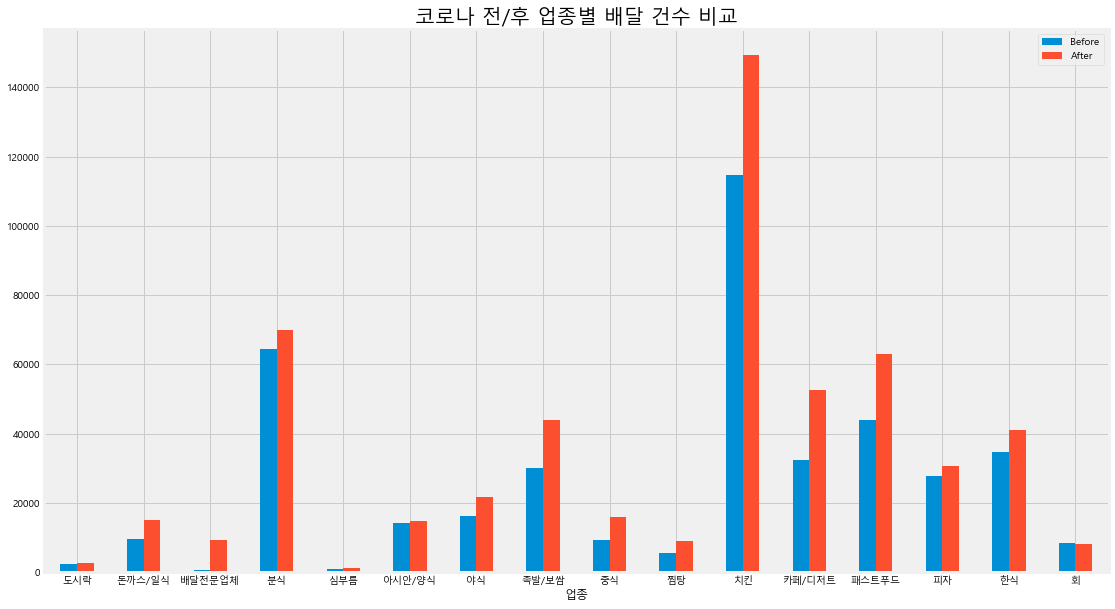

In [7]:
# 분석 시작일, 종료일
first_epidemic = "2020-02-21" # 한국 첫 유행 시작 날짜 (신천지 교회 확진자 발생일)
end_date = "2020-05-31" # 마지막 배달 데이터의 날짜

#업종 별 배달 건수 현황
dlvr_call['PROCESS_DT'] = pd.to_datetime(dlvr_call['PROCESS_DT'])

#코로나 전/후 구분
before = dlvr_call[dlvr_call['PROCESS_DT'] < pd.to_datetime(first_epidemic)]
after = dlvr_call[dlvr_call['PROCESS_DT'] >= pd.to_datetime(first_epidemic)]

#코로나 전 후 업종별 배달 건수
before_induty_count=pd.DataFrame(before.groupby(['DLVR_STORE_INDUTY_NM'])['GOODS_AMOUNT'].count()).reset_index()
after_induty_count=pd.DataFrame(after.groupby(['DLVR_STORE_INDUTY_NM'])['GOODS_AMOUNT'].count()).reset_index()
before_induty_count.columns=['업종','Before']
after_induty_count.columns=['업종','After']

total=before_induty_count.join(after_induty_count.set_index('업종'), on= '업종')

#시각화
total.plot(kind='bar',x='업종',rot=0,figsize=(17,10))
plt.title("코로나 전/후 업종별 배달 건수 비교",fontsize=20)

>* 다음과 같이 <b>배달전문업체는 코로나 발생 이후 약 13배의 배달 증가량을 보여주는 것으로 확인 되었습니다.</b>

In [8]:
total[total["업종"] == "배달전문업체"]

,업종,Before,After
2,배달전문업체,687,9453


### 2-3. 상관 관계 입증

>2020년 상반기 코로나 확진자 수와 배달량을 상관분석해보았습니다.

>한국의 코로나 발생 이후의 관계를 분석하기 위해서 배달 데이터와 코로나 확진자 수는 신천지 교회 확진자 발생일(2020-02-21) 이후부터 배달 데이터의 마지막 날짜(2020-05-31)를 대상으로 분석하였습니다.

>확진자 수가 늘어남으로써 배달량도 증가하는 것은 상관계수가 0.78로 상관관계가 높게 나왔으며, 이는 배달 건수와 코로나 확진자 수 사이의 높은 연관성을 보여줍니다. 

(0.7803705269278044, 0.2196294730721956)

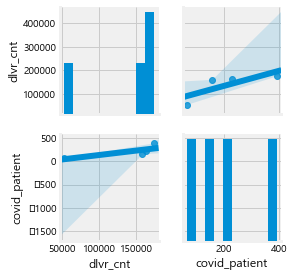

In [9]:
# 분석 시작일과 종료일 사이의 배달 건수, 확진자 정보 select
dlvr_call = dlvr_call[dlvr_call["PROCESS_DT"] >= first_epidemic]
dlvr_call = dlvr_call[dlvr_call["PROCESS_DT"] <= end_date]

corona = corona[corona["confirmed_date"] >= first_epidemic]
corona = corona[corona["confirmed_date"] <= end_date]

dlvr_call_cnt = pd.DataFrame(dlvr_call.groupby('PROCESS_DT')[['GOODS_AMOUNT']].count().to_records())
dlvr_call_cnt['PROCESS_DT']=pd.to_datetime(dlvr_call_cnt['PROCESS_DT'])
dlvr_call_cnt['month_year'] = dlvr_call_cnt['PROCESS_DT'].dt.to_period('M')

dlvr_call_1M_cnt = pd.DataFrame(dlvr_call_cnt.groupby('month_year')[['GOODS_AMOUNT']].sum().to_records())

corona_cnt = pd.DataFrame(corona.groupby('confirmed_date')[['country']].count().to_records())

corona_cnt['confirmed_date']=pd.to_datetime(corona_cnt['confirmed_date'])
corona_cnt['month_year'] = corona_cnt['confirmed_date'].dt.to_period('M')

corona_1M_cnt = pd.DataFrame(corona_cnt.groupby('month_year')[['country']].sum().to_records())

#상관관계분석
correlation=dlvr_call_1M_cnt.join(corona_1M_cnt.set_index('month_year'), on= 'month_year')
correlation.columns=['Date','dlvr_cnt','covid_patient']

#그래프 시각화
sns.pairplot(correlation, kind='reg', height=2) 


# 피어슨 상관계수 검정
corr = stats.pearsonr(correlation.dlvr_cnt, correlation.covid_patient)
corr


# 3. 배달 데이터와 플라스틱 사용량의 관계

### 3-1. 플라스틱 사용량 분석

>2020년도의 폐기물 데이터의 경우 2021년 12월에 공표를 하기 때문에, 구청별로 집계된 데이터를 사용할 수 없었습니다.
따라서 저희 팀은 정보공개포털을 이용하여 서울시의 각 구청으로부터 재활용폐기물 데이터를 요청하여 직접 제공받았습니다. 

>대회 기간 내에 제공받지 못하였거나 구청별로 수집하는 폐기물 데이터의 형식이 다른 경우 제외하였습니다.
(ex. 폐기물 종류별로 데이터를 관리하지 않거나, 발생량을 월별로 관리하지 않는 경우)

> 재활용폐기물은 광진구, 중랑구, 강동구, 은평구의 데이터를 사용하였습니다.

In [10]:
# 재활용폐기물 Data Read
Recycle_waste = pd.read_csv("서울시_재활용폐기물.csv")

In [11]:
Recycle_waste.head()

,시군구명,년-월,종이류,플라스틱
0,광진구,2020-01,157.7,153.5
1,광진구,2020-02,156.8,128.8
2,광진구,2020-03,196.0,131.8
3,광진구,2020-04,195.4,161.8
4,광진구,2020-05,184.8,161.8


2021년 6월까지만 수집된 구청도 있기 때문에 2021년 7월 데이터는 제외하였습니다.

In [12]:
Recycle_waste = Recycle_waste[Recycle_waste["년-월"] < "2021-06-31"]

다음은 광진구, 중랑구, 강동구, 은평구의 2020년, 2021년도 플라스틱 배출량입니다. 대체적으로 시간이 지남에 따라 플라스틱 배출량이 증가하는 것을 확인할 수 있습니다.

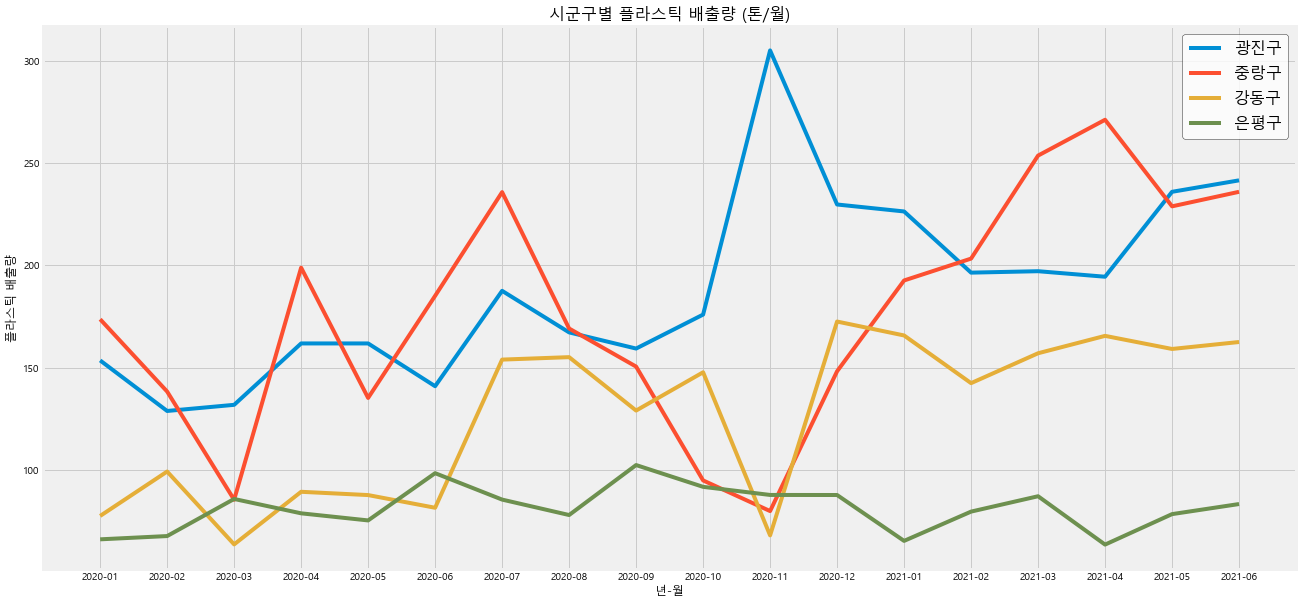

In [13]:
plt.figure(figsize=(20,10))

plt.plot(pd.unique(Recycle_waste["년-월"]), Recycle_waste[Recycle_waste["시군구명"] == "광진구"]["플라스틱"])
plt.plot(pd.unique(Recycle_waste["년-월"]), Recycle_waste[Recycle_waste["시군구명"] == "중랑구"]["플라스틱"])
plt.plot(pd.unique(Recycle_waste["년-월"]), Recycle_waste[Recycle_waste["시군구명"] == "강동구"]["플라스틱"])
plt.plot(pd.unique(Recycle_waste["년-월"]), Recycle_waste[Recycle_waste["시군구명"] == "은평구"]["플라스틱"])

plt.xlabel("년-월")
plt.ylabel("플라스틱 배출량")
plt.title("시군구별 플라스틱 배출량 (톤/월)", fontsize = 16)
legend = plt.legend(labels = ["광진구", "중랑구", "강동구", "은평구"], fontsize = 16)
frame = legend.get_frame()
frame.set_color('white')
frame.set_edgecolor('black')

> 다음은 수집한 구청의 월별 플라스틱 배출량 총합입니다. 1차 대유행 이후 배달문화가 활성화되면서 플라스틱의 발생량이 꾸준히 증가하는 을 확인할 수 있습니다.

Text(-0.2, 575, 'Shincheonji Church')

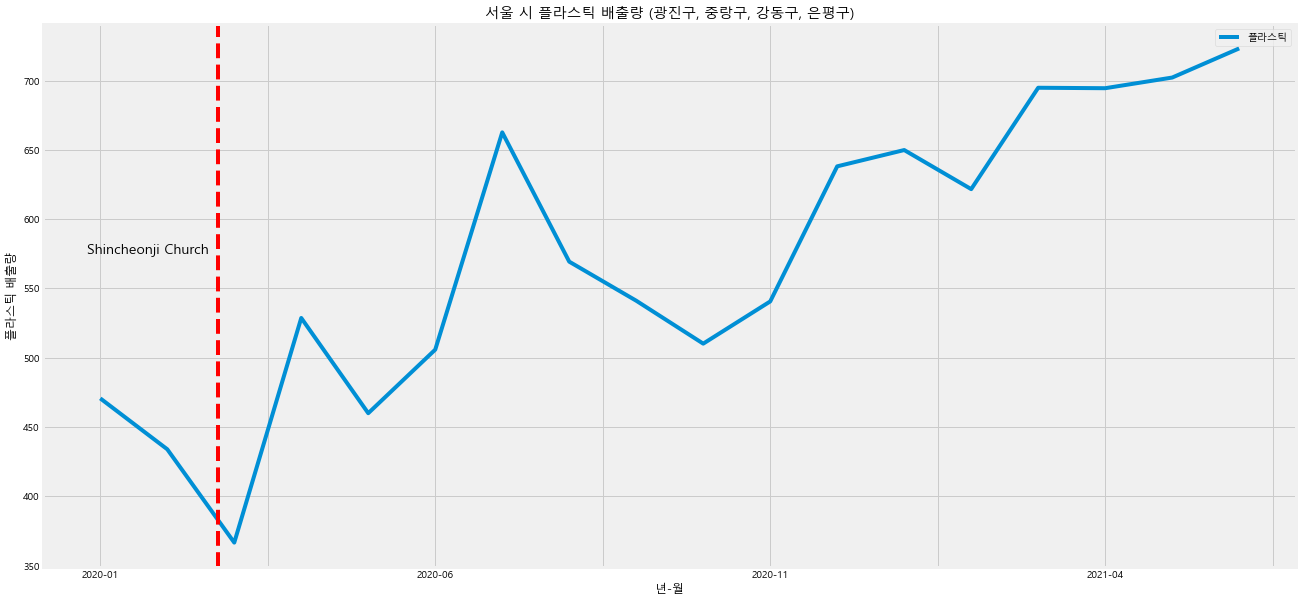

In [14]:
Recycle_waste_sum = Recycle_waste.groupby("년-월").sum()

ax = Recycle_waste_sum.plot(y = ["플라스틱"], figsize= (20, 10), title = "서울 시 플라스틱 배출량 (광진구, 중랑구, 강동구, 은평구)", ylabel = "플라스틱 배출량")
plt.axvline(x = 1.75, color = 'red', linestyle = '--', label = "2020-02.21/Shincheonji Church")
plt.text(-0.2, 575, 'Shincheonji Church', fontsize = 14)

>플라스틱 발생량과 배달 건수 데이터를 비교해보았습니다.

>배달 건수가 높아질수록 플라스틱 발생량이 증가하는 것을 볼 수 있었습니다. 코로나가 잠식되지 않으면서 배달 건수가 증가해왔고, 그에따라 일회용품들의 사용량이 현저히 늘어났기 때문에 앞으로도 높은 플라스틱 발생량을 유지할 것으로 분석됩니다.

Text(0.5, 0, '날짜')

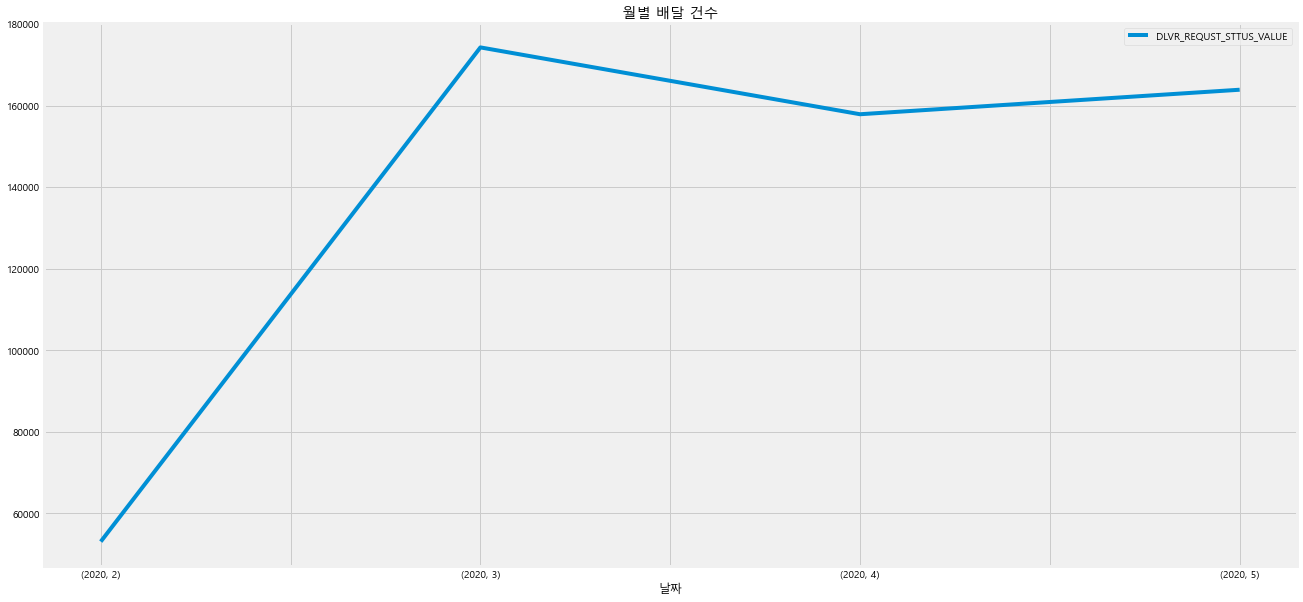

In [15]:
# 분석 시작일과 종료일 사이의 배달 건수 select
dlvr_call_range = dlvr_call[dlvr_call["PROCESS_DT"] >= first_epidemic]
dlvr_call_range = dlvr_call_range[dlvr_call_range["PROCESS_DT"] <= end_date]

# PROCESS_DT를 index로 지정
dlvr_call_range['DATE']=pd.to_datetime(dlvr_call['PROCESS_DT'],format="%Y-%m")
dlvr_call_range.set_index('DATE',inplace=True)

# 배달 완료된 주문만 사용
is_completed = dlvr_call_range["DLVR_REQUST_STTUS_VALUE"] == 1
dlvr_completed = dlvr_call_range[is_completed]

# 배달 완료된 주문을 년, 월을 기준으로 묶고, 각 년, 월에 발생한 배달 건수를 count
dlvr_groupby = dlvr_completed.groupby(by=[dlvr_completed.index.year, dlvr_completed.index.month])[["DLVR_REQUST_STTUS_VALUE"]].count()

# 월별 주문 건수
dlvr_groupby.plot(use_index = True, y = ["DLVR_REQUST_STTUS_VALUE"], figsize = (20, 10), title = "월별 배달 건수")
plt.xlabel('날짜')

<br>


# 4. 제안 및 기대효과

### 4-1. 필요성

>상기 분석 내용과 같이 코로나가 계속해서 진행됨으로써 배달량 또한 같이 증가하며 플라스틱 폐기물 또한 계속해서 증가하고 있습니다. 

>음식물이 묻거나 필름이 떼어지지 않는 등의 플라스틱은 재활용되기 어렵기 때문에 플라스틱은 단순히 처리의 문제가 아닙니다. 발생부터 줄여야 플라스틱 발생 문제를 해결할 수 있습니다.

>따라서 한번 쓰고 버리는 것이 아니라 여러번 사용할 수 있는 조건을 마련하는 것을 최우선해야 한다고 생각합니다. 또한 기업들은 생산/유통/판매 등 제품이 만들어지고 유통된 이후 폐기처리 될 때까지 전체 과정을 친환경적으로 고려해서 제품을 만들어야 한다고 생각합니다. 대량 생산하고, 대량 소비하는 시스템을 유지하는 삶의 방식이 달라지지 않는다면, 한번 쓰고 버리는 것이 익숙한 일상이 계속된다면, 앞으로 쓰레기 속에서 삶을 사는 경험을 할지 모른다고 생각합니다. 

### 4-2. 제안

저희 팀은 다음과 같이 제안합니다.


* 배달 플랫폼 일회용 용기 및 수저 주문 안하기 챌린지
  * 배달 플랫폼에서 일회용 수저를 제공하지 않는 것을 기본으로 설정
  * 고객이 일회용 수저를 원할 시 일회용 수저 받기 체크란 설정

* 다회용기 사용하기
  * 경기도 배달특급에서 현재 테스트 진행 중
  * 다회용기를 사용함으로써 플라스틱 발생량을 감소시키고 다회용기 세척에 관한 일자리 창출 가능

* 친환경 일회용품 사용하기
  * 생산 및 발명기간에서 투자비용이 클 수 있으나 플라스틱 사용량을 현저하게 줄일 수 있음


# 5. 참고자료

## 출처

관련 뉴스 기사 링크
* “족발 2인분에 15개 일회용품...재활용 가능한 건 없었다” : https://www.hankookilbo.com/News/Read/A2021021213340000980
* "배달음식 시켰는데… 일회용품 폭탄" : http://biz.newdaily.co.kr/site/data/html/2020/09/15/2020091500088.html
* “[MZ세대의 '눈'] 배달 용기 '쓰레기의 민족'으로 역사에 남지 않기를” : http://www.busan.com/view/busan/view.php?code=2021080613513504763
* 경기도 배달특급 다회용기 배달, '깨끗할까?'..세척 업체 가보니 : https://news.v.daum.net/v/20210724060021617